# Independent Component Analysis Lab

In this notebook, we'll use Independent Component Analysis to retrieve original signals from three observations each of which contains a different mix of the original signals. This is the same problem explained in the ICA video.

In [10]:
import numpy as np
import wave
from IPython.core.display import HTML
import matplotlib.pyplot as plt

In [11]:
# this is a wrapper that take a filename and publish an html <audio> tag to listen to it

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

# Data Exploration

Let's peak at the parameters of the wave file to learn more about it

In [12]:
# Read the wave file
mix_1_wave = wave.open('./data/mix1.wav','r')
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

So this file has only channel (so it's mono sound). It has a frame rate of 44100, which means each second of sound is represented by 44100 integers (integers because the file is in the common PCM 16-bit format). The file has a total of 264515 integers/frames, which means its length in seconds is:

In [13]:
264515/44100

5.998072562358277

Let's extract the frames of the wave file, which will be a part of the dataset we'll run ICA against:

In [14]:
from scipy.io import wavfile
frame_rate, x1 = wavfile.read('./data/mix1.wav')

In [15]:
x1

array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

signal_1 is now a list of ints representing the sound contained in the first file.

In [16]:
'length: ', len(x1) , 'first 100 elements: ',x1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

If we plot this array as a line graph, we'll get the familiar wave form representation:

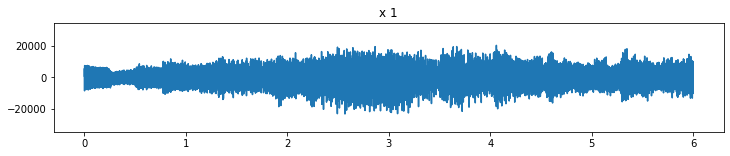

In [17]:
fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(x1)/fs, num=len(x1))


plt.figure(figsize=(12,2))
plt.title('x 1')
plt.plot(timing,x1)
plt.ylim(-35000, 35000)
plt.show()

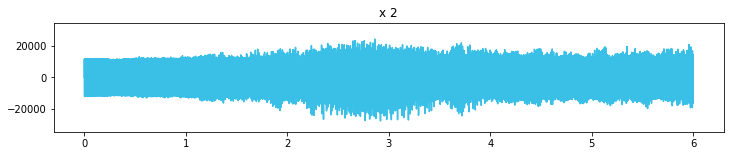

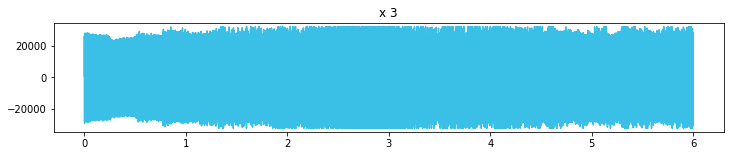

In [18]:
mix_2_wave = wave.open('./data/mix2.wav','r')
mix_3_wave = wave.open('./data/mix3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2, x2 = wavfile.read('./data/mix2.wav')
signal_raw_3, x3 = wavfile.read('./data/mix3.wav')

plt.figure(figsize=(12,2))
plt.title('x 2')
plt.plot(timing,x2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()
plt.figure(figsize=(12,2))
plt.title('x 3')
plt.plot(timing,x3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

In [19]:
wavPlayer("./data/mix1.wav")

In [20]:
wavPlayer("./data/mix2.wav")

In [21]:
wavPlayer("./data/mix3.wav")